# Day 08. Exercise 05
# Clustering

## 0. Imports

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [34]:
df = pd.read_csv('../../datasets/data/regression.csv')
df.drop('pageviews', axis=1, inplace=True)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [35]:
def kmeans_model(n, df):
    kmeans = KMeans(n_clusters=n, random_state=21)
    kmeans.fit(df[['num_commits', 'AVG(diff)']])
    df['cluster'] = kmeans.predict(df[['num_commits', 'AVG(diff)']])
    return df    

In [36]:
def plot_clusters(df, n_clusters):
    plt.title(f'n_clusters: {n_clusters}')
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['cluster'])
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()

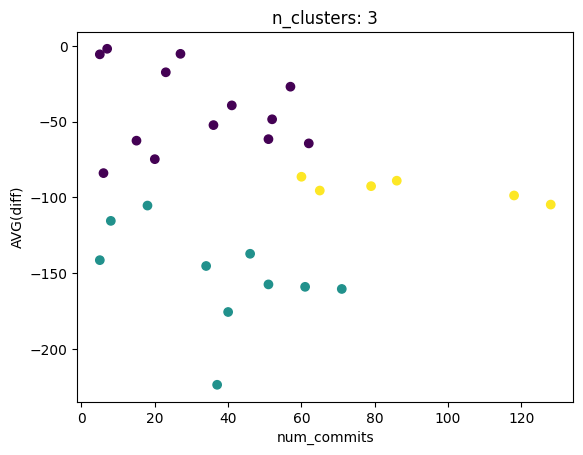

Silhouette score = 0.4454402135233297


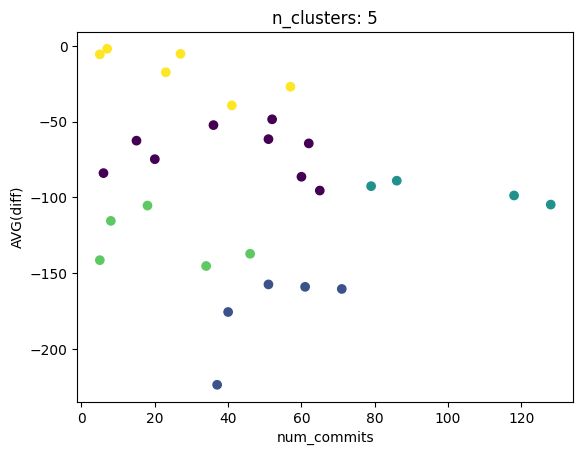

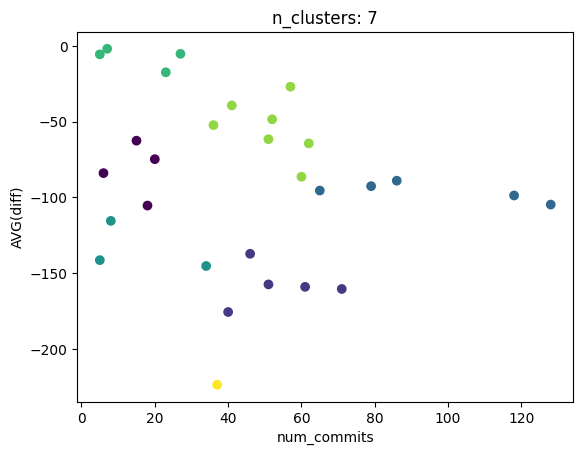

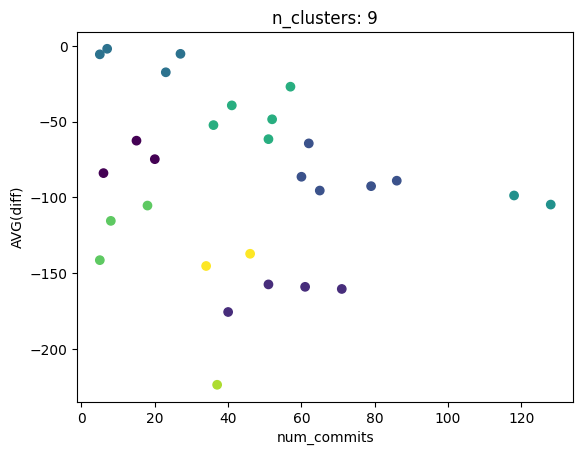

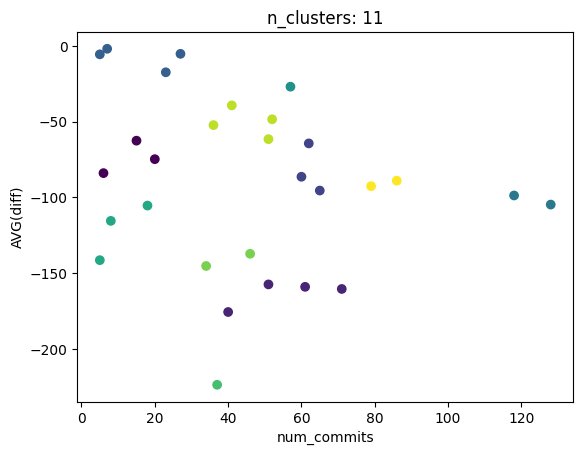

In [38]:
model_df1 = kmeans_model(3, df)
fig1 = plot_clusters(model_df1, 3)
score = silhouette_score(model_df1[['num_commits', 'AVG(diff)']], model_df1['cluster'], random_state=21)
print(f'Silhouette score = {score}')

model_df2 = kmeans_model(5, df)
fig2 = plot_clusters(model_df2, 5)

model_df3 = kmeans_model(7, df)
fig3 = plot_clusters(model_df3, 7)

model_df4 = kmeans_model(9, df)
fig4 = plot_clusters(model_df4, 9)

model_df5 = kmeans_model(11, df)
fig5 = plot_clusters(model_df5, 11)

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [39]:
def dbscan_func(df, eps_num, min_samples_num):
    dbscan = DBSCAN(eps=eps_num, min_samples=min_samples_num)
    df['cluster'] = dbscan.fit_predict(df[['num_commits', 'AVG(diff)']])
    return df

In [40]:
def dbscan_plot(df, eps, min_samples):
    plt.title(f'eps: {eps}, min_samples: {min_samples}')
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['cluster'])
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()

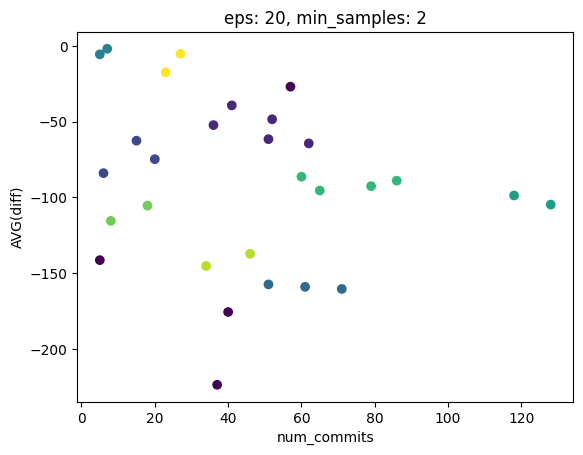

Silhouette score = 0.38339641455696616


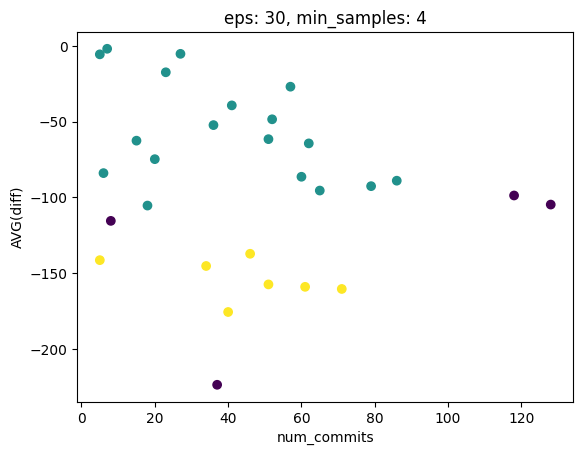

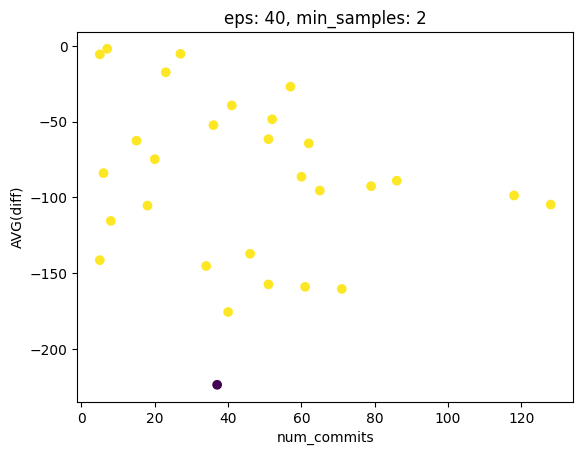

In [41]:
dbscan_model_df1 = dbscan_func(df, 20, 2)
fig1 = dbscan_plot(dbscan_model_df1, 20, 2)
score = silhouette_score(dbscan_model_df1[['num_commits', 'AVG(diff)']], dbscan_model_df1['cluster'], random_state=21)
print(f'Silhouette score = {score}')

dbscan_model_df2 = dbscan_func(df, 30, 4)
fig2 = dbscan_plot(dbscan_model_df2, 30, 4)

dbscan_model_df3 = dbscan_func(df, 40, 2)
fig2 = dbscan_plot(dbscan_model_df3, 40, 2)

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [42]:
def agg_func(df, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    df['cluster'] = model.fit_predict(df[['num_commits', 'AVG(diff)']])
    return df

In [43]:
def aggplot(df, n_clusters):
    plt.title(f'n_clusters: {n_clusters}')
    plt.scatter(df['num_commits'], df['AVG(diff)'], c=df['cluster'])
    plt.xlabel('num_commits')
    plt.ylabel('AVG(diff)')
    plt.show()

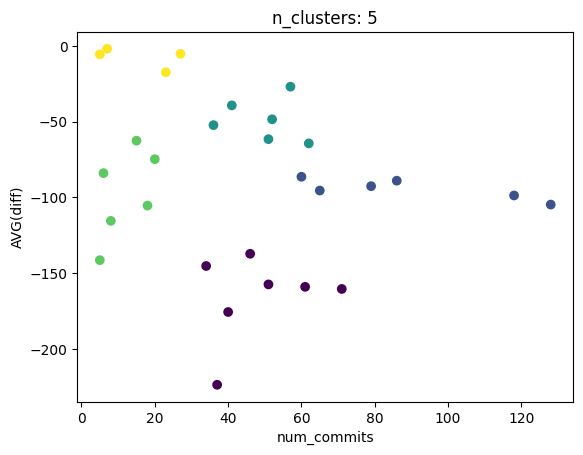

0.46383015199381467


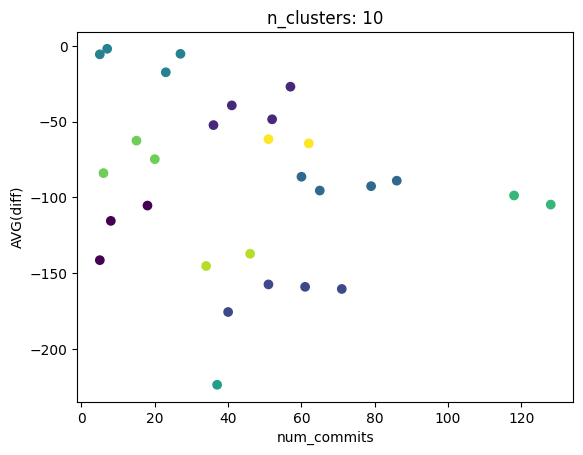

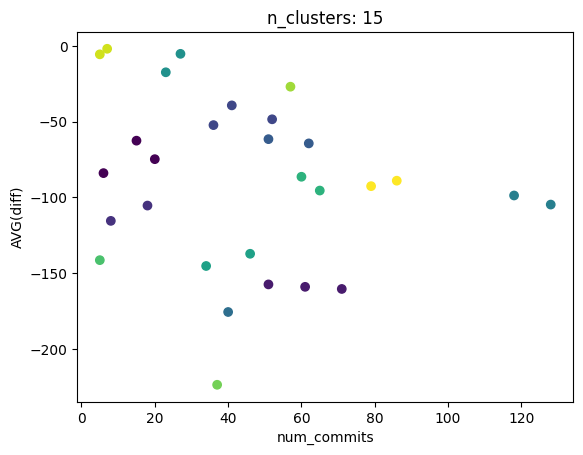

In [44]:
agg_model1 = agg_func(df, 5)
aggplot(agg_model1, 5)
score = silhouette_score(agg_model1[['num_commits', 'AVG(diff)']], agg_model1['cluster'])
print(score)

agg_model2 = agg_func(df, 10)
aggplot(agg_model2, 10)

agg_model3 = agg_func(df, 15)
aggplot(agg_model3, 15)

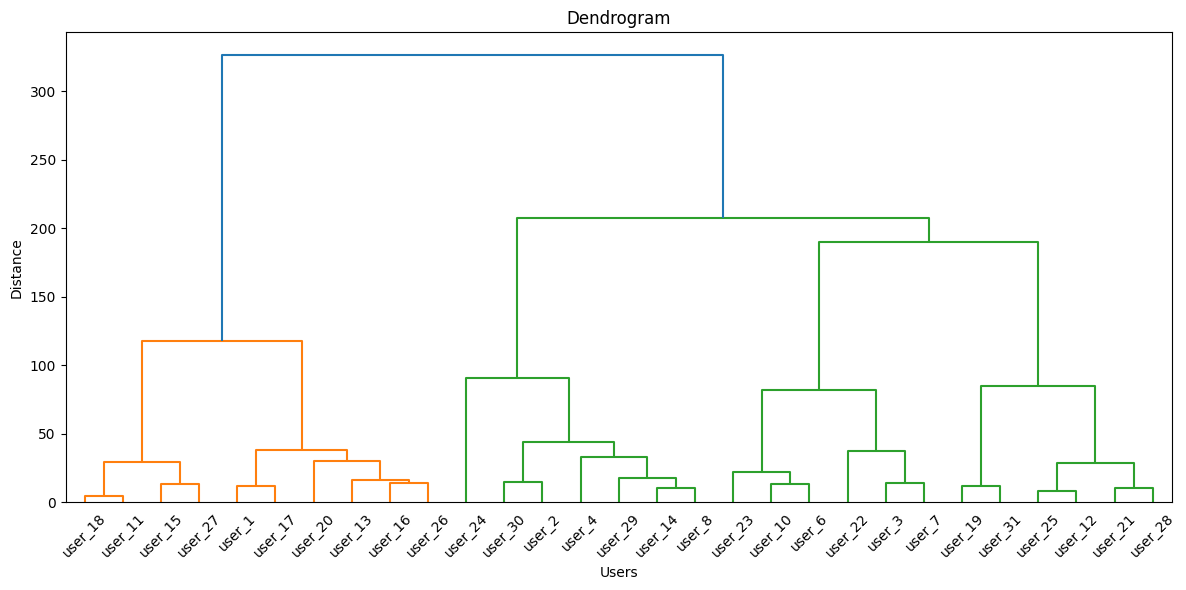

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df[['num_commits', 'AVG(diff)']], method='ward')

plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')

dendrogram(Z, labels=df['uid'].values)
plt.tight_layout()
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [88]:
def final_func(model_name, model_params, param_name, param_range):
    df = pd.read_csv('../../datasets/data/regression.csv')
    max_score = -2
    scores = []
    clusters_num = []
    if model_name == KMeans:
        df_original = df.copy()
        if param_name == 'n_clusters':
            for i in param_range:
                model_df = kmeans_model(i, df_original)
                score = silhouette_score(model_df[['num_commits', 'AVG(diff)']], model_df['cluster'])
                print(f'Silhouette score for {i} clusters: {score}')
                scores.append(score)
                clusters_num.append(i)
                if score > max_score:
                    max_score = score
                    n_clusters = i
            print(max_score, n_clusters)
            
            plt.scatter(scores, clusters_num)
            plt.xlabel('Number of clusters')
            plt.ylabel('Silhouette score')
            plt.tight_layout()
            plt.show()

            best_model_df = kmeans_model(n_clusters, df_original)
            plt.scatter(best_model_df['num_commits'], best_model_df['AVG(diff)'], c=best_model_df['cluster'])
            plt.xlabel('Number of commits')
            plt.ylabel('Average diff')
            plt.tight_layout()
            plt.show()
        else:
            raise ValueError('Invalid parameter name')
    elif model_name == DBSCAN:
        df_original = df.copy()
        if param_name == 'eps':
            eps_list = []
            for i in param_range:
                model_df = dbscan_func(df_original, eps_num=i, min_samples_num=model_params[1])
                score = silhouette_score(model_df[['num_commits', 'AVG(diff)']], model_df['cluster'])
                print(f'Silhouette score for {i} eps: {score}')
                scores.append(score)
                eps_list.append(i)
                if score > max_score:
                    max_score = score
                    eps = i
            print(max_score, eps)

            plt.scatter(scores, eps_list)
            plt.xlabel('eps')
            plt.ylabel('Silhouette score')
            plt.tight_layout()
            plt.show()

            best_model_df = dbscan_func(df_original, eps_num=eps, min_samples_num=model_params[1])
            plt.scatter(best_model_df['num_commits'], best_model_df['AVG(diff)'], c=best_model_df['cluster'])
            plt.xlabel('Number of commits')
            plt.ylabel('Average diff')
            plt.tight_layout()
            plt.show()
        elif param_name == 'min_samples':
            min_samples_list = []
            for i in param_range:
                model_df = dbscan_func(df_original, eps_num=model_params[0], min_samples_num=i)
                score = silhouette_score(model_df[['num_commits', 'AVG(diff)']], model_df['cluster'])
                print(f'Silhouette score for {i} min_samples: {score}')
                scores.append(score)
                min_samples_list.append(i)
                if score > max_score:
                    max_score = score
                    min_samples = i
            print(max_score, min_samples)

            plt.scatter(scores, min_samples_list)
            plt.xlabel('min_samples')
            plt.ylabel('Silhouette score')
            plt.tight_layout()
            plt.show()

            best_model_df = dbscan_func(df_original, eps_num=model_params[0], min_samples_num=min_samples)
            plt.scatter(best_model_df['num_commits'], best_model_df['AVG(diff)'], c=best_model_df['cluster'])
            plt.xlabel('Number of commits')
            plt.ylabel('Average diff')
            plt.tight_layout()
            plt.show()
        else:
            raise ValueError('Invalid parameter name')
    elif model_name == AgglomerativeClustering:
        df_original = df.copy()
        if param_name == 'n_clusters':
            for i in param_range:
                model_df = agg_func(df_original, i)
                score = silhouette_score(model_df[['num_commits', 'AVG(diff)']], model_df['cluster'])
                print(f'Silhouette score for {i} n_clusters: {score}')
                scores.append(score)
                clusters_num.append(i)
                if score > max_score:
                    max_score = score
                    n_clusters = i
            print(max_score, n_clusters)

            plt.scatter(scores, clusters_num)
            plt.xlabel('Number of clusters')
            plt.ylabel('Silhouette score')
            plt.tight_layout()
            plt.show()

            best_model_df = agg_func(df_original, n_clusters)
            plt.scatter(best_model_df['num_commits'], best_model_df['AVG(diff)'], c=best_model_df['cluster'])
            plt.xlabel('Number of commits')
            plt.ylabel('Average diff')
            plt.tight_layout()
            plt.show()
    else:
        raise ValueError('Invalid model name')

Silhouette score for 2 clusters: 0.4194920562377423
Silhouette score for 3 clusters: 0.4454402135233297
Silhouette score for 4 clusters: 0.41503879936268956
Silhouette score for 5 clusters: 0.3521030626149593
Silhouette score for 6 clusters: 0.3954350435152892
Silhouette score for 7 clusters: 0.3963747661984397
Silhouette score for 8 clusters: 0.48638087320227846
Silhouette score for 9 clusters: 0.4537667044117413
0.48638087320227846 8


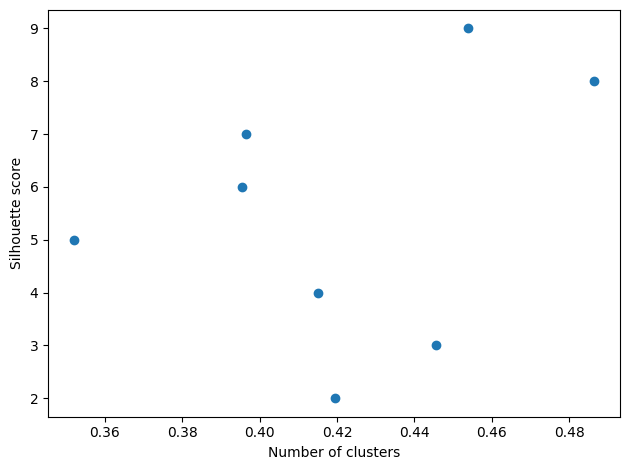

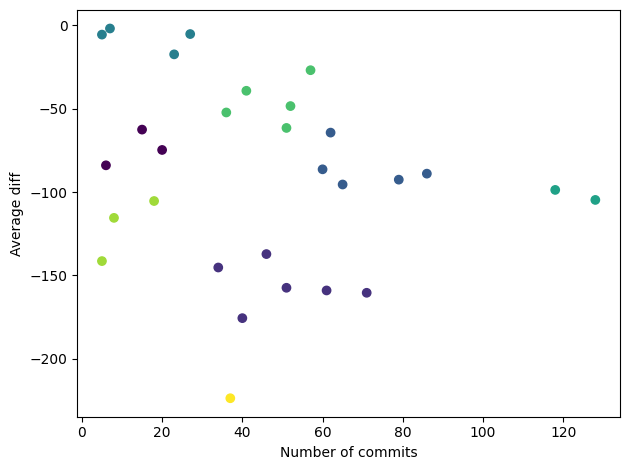

In [76]:
final_func(KMeans, 3, 'n_clusters', list(range(2,10)))

Silhouette score for 20 eps: 0.38339641455696616
Silhouette score for 21 eps: 0.46460465476488433
Silhouette score for 22 eps: 0.4794129092034348
Silhouette score for 23 eps: 0.3875440298477327
Silhouette score for 24 eps: 0.3373231449127411
Silhouette score for 25 eps: 0.34388947016930727
Silhouette score for 26 eps: 0.34388947016930727
Silhouette score for 27 eps: 0.34247595585427343
Silhouette score for 28 eps: 0.34247595585427343
Silhouette score for 29 eps: 0.3591013048620609
0.4794129092034348 22


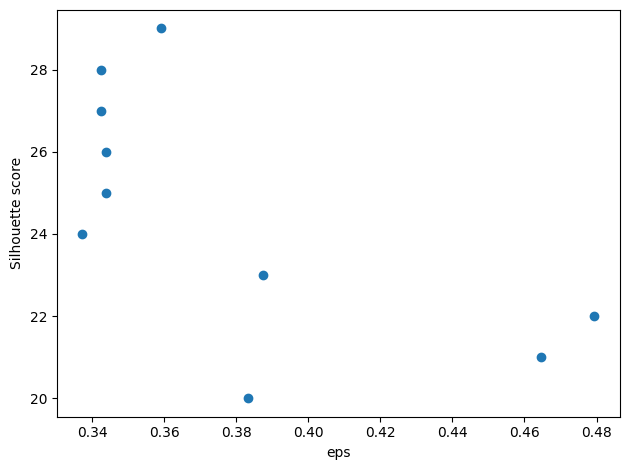

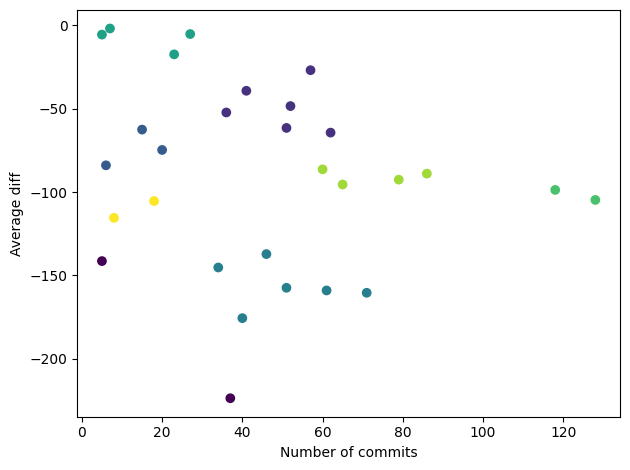

In [87]:
final_func(DBSCAN, (20, 2), 'eps', list(range(20,30)))

Silhouette score for 1 min_samples: 0.3659855186711519
Silhouette score for 2 min_samples: 0.3659855186711519
Silhouette score for 3 min_samples: 0.3659855186711519
Silhouette score for 4 min_samples: 0.3659855186711519
Silhouette score for 5 min_samples: 0.2974765429800326
Silhouette score for 6 min_samples: 0.3589402134406695
0.3659855186711519 1


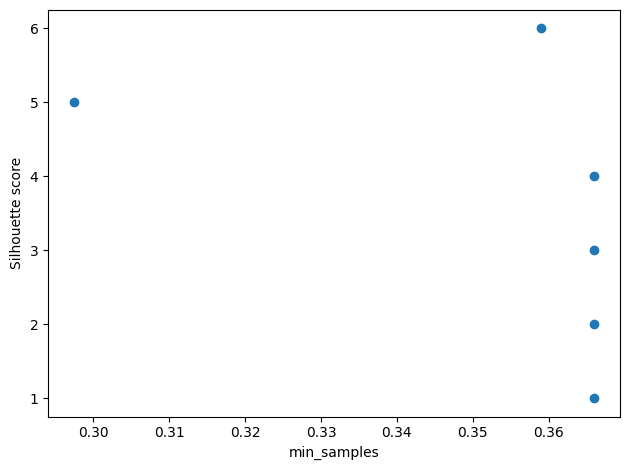

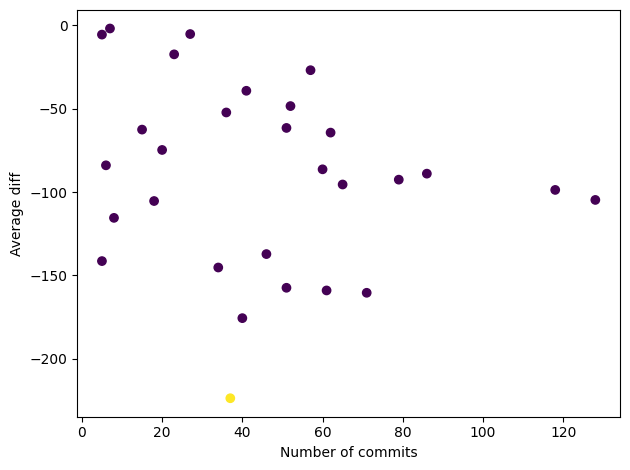

In [93]:
final_func(DBSCAN, (40,4), 'min_samples', list(range(1,7)))

Silhouette score for 2 n_clusters: 0.35902490572221984
Silhouette score for 3 n_clusters: 0.3390493703444805
Silhouette score for 4 n_clusters: 0.4448362750283643
Silhouette score for 5 n_clusters: 0.46383015199381467
Silhouette score for 6 n_clusters: 0.4527145606287827
Silhouette score for 7 n_clusters: 0.4865808853184314
Silhouette score for 8 n_clusters: 0.5077985556562201
Silhouette score for 9 n_clusters: 0.47576869039147557
0.5077985556562201 8


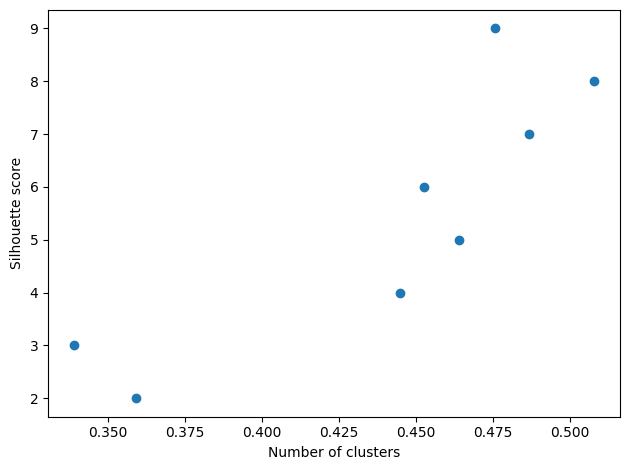

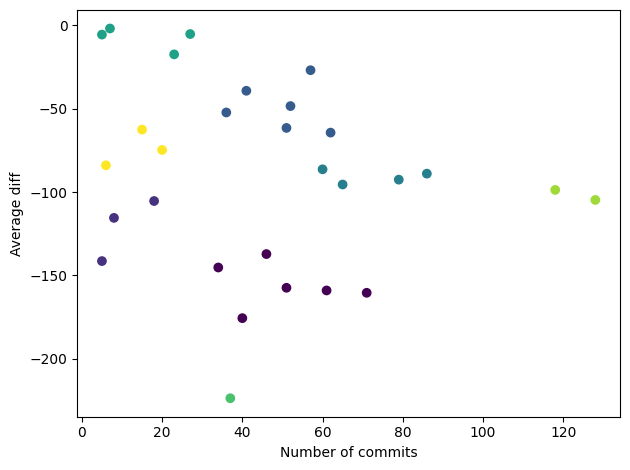

In [79]:
final_func(AgglomerativeClustering, 3, 'n_clusters', list(range(2,10)))